<a href="https://colab.research.google.com/github/LOWERCAS3/PyTorch/blob/main/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import necessary libraries
import torch
import matplotlib.pyplot as plt
from torch import nn

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [3]:
# Create the data parameters
# Setting weights and biases for funtion to create y for our dataset
weight = 0.3
bias = 0.9

# Make X and y using linear regression feature
X = torch.arange(0, 1, 0.01).unsqueeze(dim=1)
y = weight * X + bias
print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [4]:
# Split the data into training and testing
# Train vs Test split is 80/20
train_split = int(len(X) * 0.8)
train_split

# Train Split
X_train, y_train = X[:train_split], y[:train_split]
print(f"(X_train, y_train): {len(X_train),len(y_train)}")

# Test Split
X_test, y_test = X[train_split:], y[train_split:]
print(f"(X_test, y_test): {len(X_test),len(y_test)}")

(X_train, y_train): (80, 80)
(X_test, y_test): (20, 20)


In [5]:
# Plot the training and testing data 
def plot_data_preds(train_data=X_train,
                    train_label=y_train,
                    test_data=X_test,
                    test_label=y_test,
                    predictions=None):
    """
    This funtion plots training data, test data and predictions in form of scatter plot and compares them.
    """
    plt.figure(figsize=(10, 6))

    # Plotting training data
    plt.scatter(train_data, train_label, c='b', s=4, label='Training data')

    # Plotting testing data
    plt.scatter(test_data, test_label, c='g', s=4, label='Testing data')

    # Plotting predictions
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

    # Adding legend
    plt.legend(prop={'size': 14})

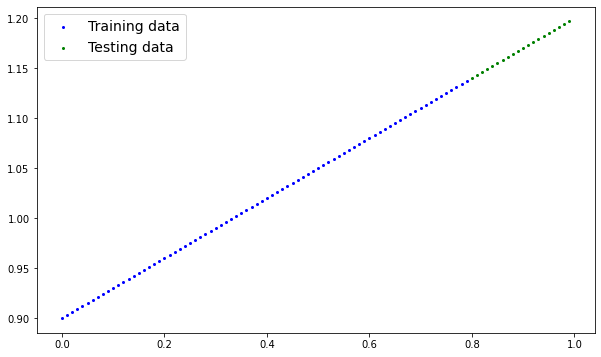

In [6]:
plot_data_preds()

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [7]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
    # Constructor
    def __init__(self):
        super().__init__()

        # Initializing weights and bias with random values
        # self.weights = nn.Parameter(torch.randn(1,
        #                                    requires_grad=True,
        #                                    dtype=float))
        # self.bias = nn.Parameter(torch.randn(1,
        #                                 requires_grad=True,
        #                                 dtype=float))
        
        # Using nn.Linear to initialize layers
        self.linear_layers = nn.Linear(in_features=1,
                                       out_features=1)


    #  Defining forward function for the computation to be performed in order to create outputs
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # return self.weights * x + self.bias
        return self.linear_layers(x)

In [8]:
# Instantiate the model and put it to the target device
# Seeding the model with random seed
torch.manual_seed(42)
# Instantiating the model
model = LinearRegressionModel().to(device)
# Checking the state_dict for the model
model.state_dict()

OrderedDict([('linear_layers.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layers.bias', tensor([0.8300], device='cuda:0'))])

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [9]:
# Create the loss function and optimizer

# L1Loss function will be used (Also know as mean absolute error [MSA])
loss_fn = nn.L1Loss()

# Random gradient descent optimizer will be used (Also know as Stochastic gradient descent [SGD])
# Parameters passed from the model created in last cell
# lr -> learning rate (how finer or coarser you want your model to learn?)
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01) 

In [10]:
# Training loop
from torch import nn
torch.manual_seed(42)

# Train model for 300 epochs
epochs = 300

# Send data to target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training

    # Put model in train mode
    model.train()

    # 1. Forward pass
    y_preds = model(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_preds, y_train)

    # 3. Zero gradients
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Perform testing every 20 epochs
    if epoch % 20 == 0:

        # Put model in evaluation mode and setup inference context 
        model.eval()
        with torch.inference_mode():
            # 1. Forward pass
            test_preds = model(X_train)      
            # 2. Calculate test loss
            test_loss = loss_fn(test_preds, y_train)
        # Print out what's happening
        print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.128 | Test loss: 0.123
Epoch: 20 | Train loss: 0.082 | Test loss: 0.081
Epoch: 40 | Train loss: 0.072 | Test loss: 0.072
Epoch: 60 | Train loss: 0.065 | Test loss: 0.065
Epoch: 80 | Train loss: 0.058 | Test loss: 0.058
Epoch: 100 | Train loss: 0.051 | Test loss: 0.051
Epoch: 120 | Train loss: 0.045 | Test loss: 0.044
Epoch: 140 | Train loss: 0.038 | Test loss: 0.037
Epoch: 160 | Train loss: 0.031 | Test loss: 0.030
Epoch: 180 | Train loss: 0.024 | Test loss: 0.024
Epoch: 200 | Train loss: 0.017 | Test loss: 0.017
Epoch: 220 | Train loss: 0.010 | Test loss: 0.010
Epoch: 240 | Train loss: 0.003 | Test loss: 0.003
Epoch: 260 | Train loss: 0.008 | Test loss: 0.004
Epoch: 280 | Train loss: 0.008 | Test loss: 0.004


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [11]:
# Make predictions with the model
model.eval()
with torch.inference_mode():
    y_preds = model(X_test)
y_preds

tensor([[1.1333],
        [1.1363],
        [1.1393],
        [1.1423],
        [1.1454],
        [1.1484],
        [1.1514],
        [1.1545],
        [1.1575],
        [1.1605],
        [1.1635],
        [1.1666],
        [1.1696],
        [1.1726],
        [1.1757],
        [1.1787],
        [1.1817],
        [1.1847],
        [1.1878],
        [1.1908]], device='cuda:0')

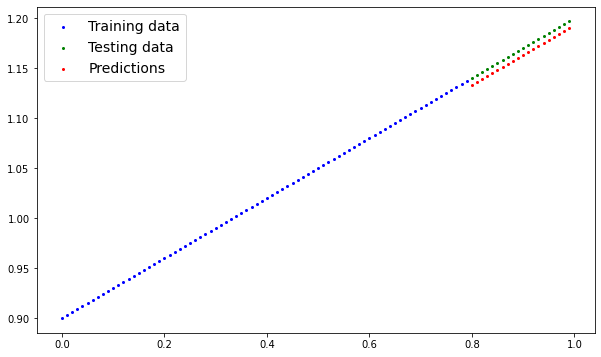

In [12]:
# Plot the predictions (these may need to be on a specific device)
plot_data_preds(predictions=y_preds.cpu())

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [13]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_exercise.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

In [14]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model = LinearRegressionModel()

# Moving loaded instance to device
loaded_model.to(device)

# Loading saved model to new instance of model
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [15]:
# Make predictions with loaded model and compare them to the previous
loaded_model.eval()
with torch.inference_mode():
    loaded_preds = loaded_model(X_test)
loaded_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

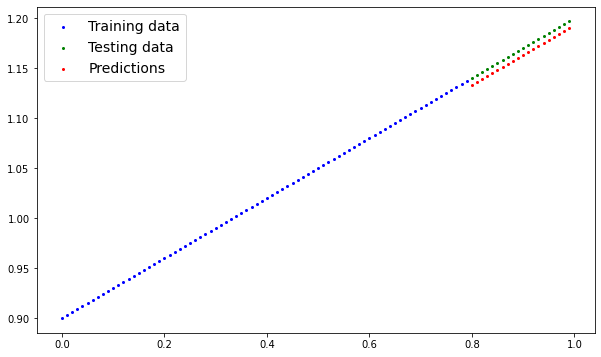

In [16]:
plot_data_preds(predictions=loaded_preds.cpu())